In [34]:
# Set overlap utility function
import numpy as np
import pandas as pd
import rbo
import matplotlib.pyplot as plt 

def print_set_overlap(ranking1, ranking2, k):
    """
    Provide the correlation analysis of top-k features from the 2 list of rankings
    ranking1, ranking2: list of size = number of data points
            each element is a ranking of features
            
    returns pd.Series(rank based overlap)
    Prints the Series analysis of rank correlation values between both the rankings
    (Mean, std, Min, 25%, 50%, 75%, Max, Histogram)
    """
    overlap_values = []
    idx_arr = np.arange(len(ranking1))
    for r1, r2 in zip(ranking1, ranking2):
        
        # Sorting the rankings in descending order of the absolute attribution values.
        contributions = set([attr_value[1] for attr_value in 
                        sorted(zip(r1, idx_arr), key=lambda temp: -abs(temp[0]))][:k])
    
#         print("contributions",contributions)
#         print("r2",r2)
        overlap_len = len(contributions.intersection(r2))
        if(len(r2)==0):
            overlap = 1
        else:
            overlap = overlap_len/len(r2)
        
        overlap_values.append(overlap)
    print(pd.Series(overlap_values).describe())
    plt.hist(overlap_values) 
    
    return pd.Series(overlap_values)    

In [35]:
import pandas as pd

def calculate_accuracy(SHAPminusBaseline, TIminusBaseline, data_x, Baseline_x,k):
    treatment_vars = [10,11,12]
    treatment_vars_data = [4,5,6]
    SHAPminusBaseline_df = pd.read_csv(SHAPminusBaseline,header=None,delim_whitespace=True)
    TIminusBaseline_df = pd.read_csv(TIminusBaseline,header=None,delim_whitespace=True)
    data_x_df = pd.read_csv(data_x)
    Baseline_x_arr = np.array(pd.read_csv(Baseline_x,header=None)[0].tolist())
    
    # Getting just the treatment values from the x variables
    data_x_df_treatment = data_x_df.iloc[:,treatment_vars_data]
    data_x_df_treatment.columns = treatment_vars
    
    # Contains false if the treatment variable is not the same as the baseline
    treatment_df = (Baseline_x_arr[treatment_vars].astype(int) == data_x_df_treatment) 
    
    aList = []
    for _,row in treatment_df.iterrows():
        
        treated = set()
        for col in treatment_df:
            if row[col]==False:
                treated.add(col)
        aList.append(treated)
    print_set_overlap(SHAPminusBaseline_df.to_numpy(),aList,k)
    print_set_overlap(TIminusBaseline_df.to_numpy(),aList,k)



count    54.000000
mean      0.456790
std       0.348981
min       0.000000
25%       0.083333
50%       0.500000
75%       0.625000
max       1.000000
dtype: float64
count    54.000000
mean      0.475309
std       0.330820
min       0.000000
25%       0.333333
50%       0.500000
75%       0.666667
max       1.000000
dtype: float64


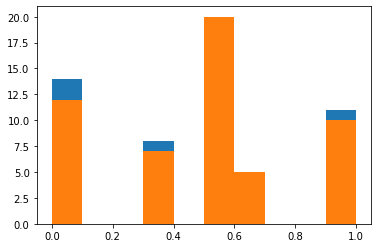

In [36]:
SHAPminusBaseline_filename = "./diffInterpretations_templates_randomBaseline/diffInterpreted_SHAP_outs_mb(2012,0,3,1,0,0,135)_test.txt"
TIminusBaseline_filename = "./diffInterpretations_templates_randomBaseline/diffInterpreted_TI_outs_mb(2012,0,3,1,0,0,135)_test.txt"
data_x_filename = "./Test_subset/covComb(2012,0,3,1,0,0,135)_test.csv"
Baseline_x = "./diffInterpretations_templates_randomBaseline/diffInterpreted_SHAP_baseline_0_outs_mb(2012,0,3,1,0,0,135)_test.txt"

calculate_accuracy(SHAPminusBaseline_filename,TIminusBaseline_filename,data_x_filename,Baseline_x,5)


In [234]:
data_x_df = pd.read_csv(data_x_filename)
data_x_df_treatment = data_x_df.iloc[:,treatment_vars_data]
data_x_df_treatment.columns = treatment_vars

Baseline_x_arr = np.array(pd.read_csv(Baseline_x,header=None)[0].tolist())
treatment_df = (Baseline_x_arr[treatment_vars].astype(int) == data_x_df_treatment)

In [235]:
data_x_df_treatment

,10,11,12
0,1,0,2
1,0,2,2
2,0,1,1
3,2,2,1
4,2,0,0
5,2,2,0
6,1,0,0
7,0,1,1
8,1,2,1
9,0,0,0


In [236]:
treatment_df

,10,11,12
0,True,False,False
1,False,False,False
2,False,True,False
3,False,False,False
4,False,False,True
5,False,False,True
6,True,False,True
7,False,True,False
8,True,False,False
9,False,False,True
